# Clusting: K-Means In-Depth
1. an unsupervised clustering technique (非監督式)
2. 演算法基本步驟
   a. 依資料集數決定適當的K個重心, 例如:2個 (預設K=8)
   b. 計算資料集和重心的距離,然後以距離最近重心的資料來分成群組
   c. 重新計算群組資料集各特徵的算術平均數作為新的重心
   d. 再次計算資料集和重心的距離,然後以距離的重心來分成群組
   e. 重覆c,d步驟,直到重心和群組不再改變為止.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#use seaborn plotting defaults
import seaborn as sns
sns.set()

make_blobs: 用來生成聚類算法的測試資料
sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)[source]

n_samples: 樣本總數
n_features: 每個樣本的特徵數
centers: 類別數。
cluster_std: 每個類別的標準差, 若有兩類以上可以設值為[1.0,3.0]


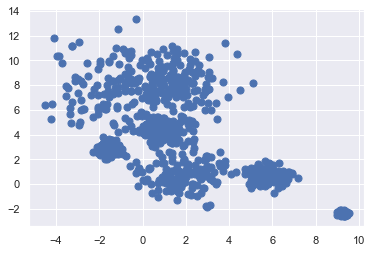

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, 
                  centers=7,
                  random_state=0, 
                  cluster_std=[0.60,1.0,0.3,2,0.1,0.5,1.2])
plt.scatter(X[:,0], X[:,1], s=50)

[[ 1.94058873  0.69483426]
 [ 0.95844596  4.46941297]
 [ 9.27608874 -2.33061538]
 [ 1.52890947  8.52639552]
 [-1.57612546  2.98364888]
 [ 5.76437107  0.65396948]
 [-1.68332391  8.27068068]]


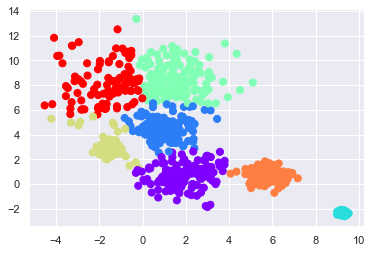

In [13]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters=7)
est.fit(X)
y_kmeans = est.predict(X)   # 分群預測
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='rainbow')
print(est.cluster_centers_)

In [4]:
# interact 互動練習
from ipywidgets import interact
import numpy as np

def f(x=0, n=4):
    print('x=',x,' n=',n)

#執行interact就有互動功能了
interact(f, x=[0,5], n=[2,10])

interactive(children=(Dropdown(description='x', options=(0, 5), value=0), Dropdown(description='n', options=(2…

<function __main__.f(x=0, n=4)>

In [5]:
from ipywidgets import interact
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import warnings
import matplotlib.pyplot as plt

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        X, y = make_blobs(n_samples=1000,   # 設為與上方相同的樣本空間
                  centers=7,
                  random_state=0, 
                  cluster_std=[0.60,1.0,0.3,2,0.1,0.5,1.2])

        def _kmeans_step(nsteps=20, n_clusters=7):
            rng = np.random.RandomState(2)     # random select centers(x,y)
            labels = np.zeros(X.shape[0])
            centers = rng.randn(n_clusters, 2)


            for i in range(nsteps + 1):
                old_centers = centers
                dist = euclidean_distances(X, centers)   # 計算 X向量 與 centers向量 距離
                labels = dist.argmin(1)         # 取 axis=1 之最小索引值作為label(集名稱)

                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])  # 取各集的算數平圴作為新重心
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]


            # plot the data and cluster centers
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                        vmin=0, vmax=n_clusters - 1);
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',   # 舊重心
                        c=np.arange(n_clusters),
                        s=200, cmap='rainbow')
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',   # 新重心
                        c='black', s=50)

    return interact(_kmeans_step, nsteps=[i for i in range(50)], n_clusters=[i for i in range(2,11)])

plot_kmeans_interactive()


interactive(children=(Dropdown(description='nsteps', index=20, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, …

<function __main__.plot_kmeans_interactive.<locals>._kmeans_step(nsteps=20, n_clusters=7)>

# Application of KMeans to Digits
For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.data[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

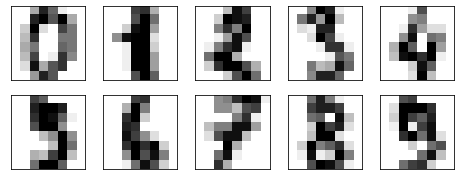

In [5]:
# digits.data 為一 1797 * 64 的資料集
# 其實體為 1797 張 8*8 的手寫數字16灰階影像
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,3))   #  figsize 以英寸為單位定義圖形尺寸
for i in range(10):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape((8,8)), 
              cmap=plt.cm.binary)

In [6]:
from sklearn.cluster import KMeans

est=KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
print(est.cluster_centers_.shape)
print(clusters.shape)

(10, 64)
(1797,)


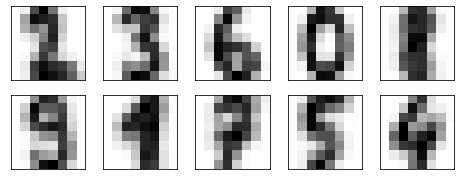

In [7]:
# est.cluster_center_   : cluster 後的中心點
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8,8)), 
              cmap=plt.cm.binary)

In [14]:
clusters[1:10]

array([4, 4, 1, 9, 5, 2, 7, 4, 5])

In [25]:
# mode 尋找數組或陣列中最常出現的數字及其次數
# digits.target 為data的真實答案
from scipy.stats import mode  
import numpy as np
labels = np.zeros_like(clusters)
for i in  range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [26]:
clusters[1:100] # predict 分群結果 (非答案, 是將答案變成群)(在此8為第4群)

array([4, 4, 1, 9, 5, 2, 7, 4, 5, 3, 6, 0, 1, 9, 8, 2, 7, 4, 5, 3, 6, 0,
       1, 6, 8, 2, 6, 4, 5, 3, 5, 8, 8, 2, 8, 3, 5, 4, 5, 4, 9, 6, 7, 7,
       1, 8, 6, 3, 3, 4, 4, 7, 4, 7, 3, 6, 4, 2, 1, 1, 7, 1, 1, 9, 2, 2,
       2, 9, 4, 6, 8, 3, 5, 8, 6, 4, 6, 3, 3, 6, 7, 2, 1, 0, 6, 7, 9, 2,
       1, 6, 1, 1, 4, 7, 4, 4, 9, 1, 4])

In [27]:
labels[1:100] # 依mode 將出現最多次數的作為labels

array([8, 8, 3, 4, 9, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 1, 5, 6, 1, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 8, 8, 7, 8, 7, 0, 1, 8, 6, 3, 3, 7, 3, 3, 4, 6, 6,
       6, 4, 8, 1, 5, 0, 9, 5, 1, 8, 1, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6,
       3, 1, 3, 3, 8, 7, 8, 8, 4, 3, 8])

In [28]:
digits.target[1:100] # 正確答案

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6,
       6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6,
       3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

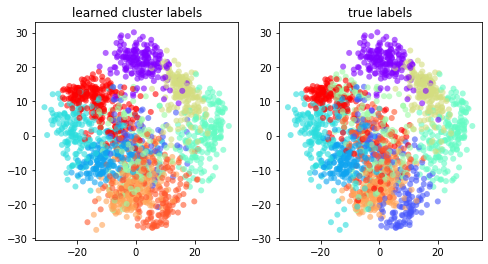

In [30]:
# 畫出來 比較
# PCA : 非監督式學習法, 綫性變換(將高維度的空間取其數據的主成分,降維到低維度空間)
# PCA(2) 表示取二個特徵值
from sklearn.decomposition import PCA

X=PCA(2).fit_transform(digits.data)
kwargs = dict(cmap=plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:,0], X[:,1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   2   0   5   2   4 102  50]
 [  0  20   0   6   0   6   0   7   2 139]]


Text(0.5, 0, 'predicted')

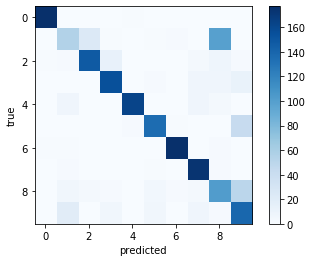

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# KMeans for Color Compression
One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

In [2]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
china=load_sample_image('china.jpg')
plt.imshow(china)
plt.grid(False)

In [3]:
china.shape

(427, 640, 3)

In [4]:
X=(china/255.0).reshape(-1,3)
print(X.shape)

(273280, 3)


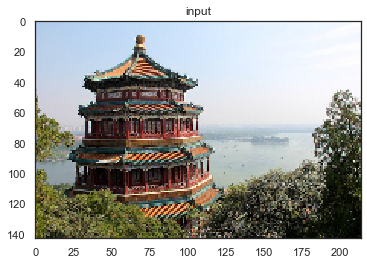

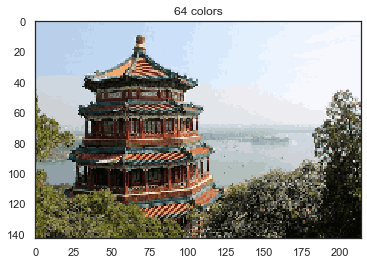

In [7]:
# 
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
sns.set()

image=china[::3,::3]
n_colors =64
X=(image/255.0).reshape(-1,3)

model = KMeans(n_colors)
labels = model.fit_predict(X)
colors=model.cluster_centers_
new_image=colors[labels].reshape(image.shape)
new_image=(255*new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')
    
    plt.figure()
    plt.imshow(new_image)
    plt.title('{} colors'.format(n_colors))

In [10]:
print(type(colors), '', colors.shape)

<class 'numpy.ndarray'>  (64, 3)


In [11]:
print(type(labels),'' , labels.shape)

<class 'numpy.ndarray'>  (30602,)


In [12]:
colors[labels].shape

(30602, 3)

In [13]:
colors[labels][1]

array([0.72986166, 0.81916857, 0.92131357])

In [22]:
labels[:20]

array([35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35], dtype=int32)

In [15]:
labels[colors]

IndexError: arrays used as indices must be of integer (or boolean) type

In [18]:
colors[:2]

array([[0.9705327 , 0.97446068, 0.99229356],
       [0.26630428, 0.14795833, 0.12351   ]])

In [21]:
aa=np.array([[0.9, 0.8, 0.7],[0.1,0.2,0.3]])
al=np.array([0,1,0,1,1,1,1,0,0,1])
print(aa.shape, '', al.shape)
print(aa[al])
print(al[aa])

(2, 3)  (10,)
[[0.9 0.8 0.7]
 [0.1 0.2 0.3]
 [0.9 0.8 0.7]
 [0.1 0.2 0.3]
 [0.1 0.2 0.3]
 [0.1 0.2 0.3]
 [0.1 0.2 0.3]
 [0.9 0.8 0.7]
 [0.9 0.8 0.7]
 [0.1 0.2 0.3]]


IndexError: arrays used as indices must be of integer (or boolean) type